## SpotiPy-Wrapped
#### By: Patrick D
### Usage Instructions:
1) Request your personal data from Spotify:  spotify.com -> my profile -> privacy -> request personal data -> wait a few days  
2) Unzip files into the input folder within this directory  
3) Change the 'directory' variable to point to your folder  
4) Run the notebook  
5) Change input variables of functions to get more specific information  

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import os.path
from pathlib import Path 
import time
import datetime

import cleaner
import helper
# Jupyter theming options: 
# from jupyterthemes import jtplot
# jtplot.style()

### Data Cleaning

In [2]:
# Import cleaner.py functions
from cleaner import *
# Import helper.py functions
from helper import *

In [3]:
# create listening history dataframe from desired directory within input folder
print(os.getcwd())
directory = Path('input/06-28-22') # change this to '/input/your-directory-name'
his = read_history(directory)

# uncomment this if you want your dataframe output as a csv (change end of directory to your desired one)
# his.to_csv('~/Documents/Python/Spotify-Analysis/input/12-06-21/his.csv', index = False)

his.tail(5)

c:\Users\patri\Documents\GitHub\SpotiPy-Wrapped


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'input\\06-28-22'

In [ ]:
skipped = sort_skipped(his)
unskipped = sort_unskipped(his)

tracks = get_tracks(unskipped)
artists = get_artists(unskipped)

c:\Users\patri\Documents\Python\SpotiPy-Wrapped-main\cleaner.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unskipped['endTime'] = pd.to_datetime(unskipped['endTime'])


### Graphs

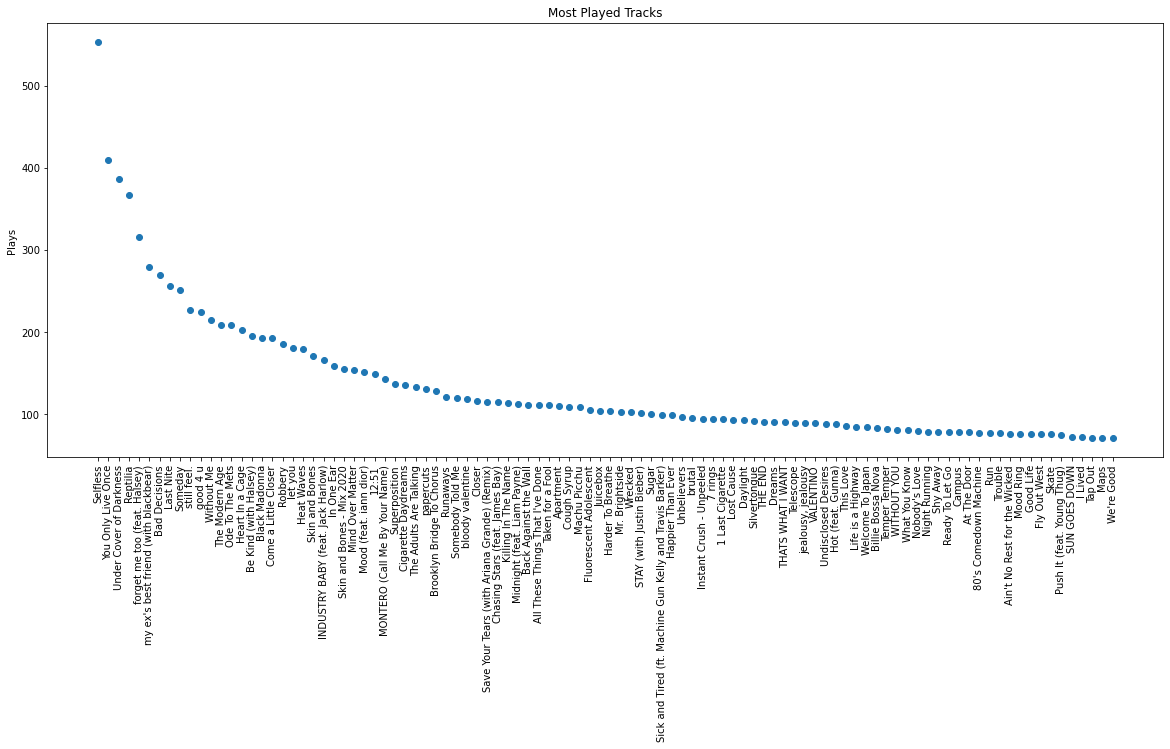

In [ ]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(tracks.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Played Tracks')
plt.ylabel('Plays')
plt.show()

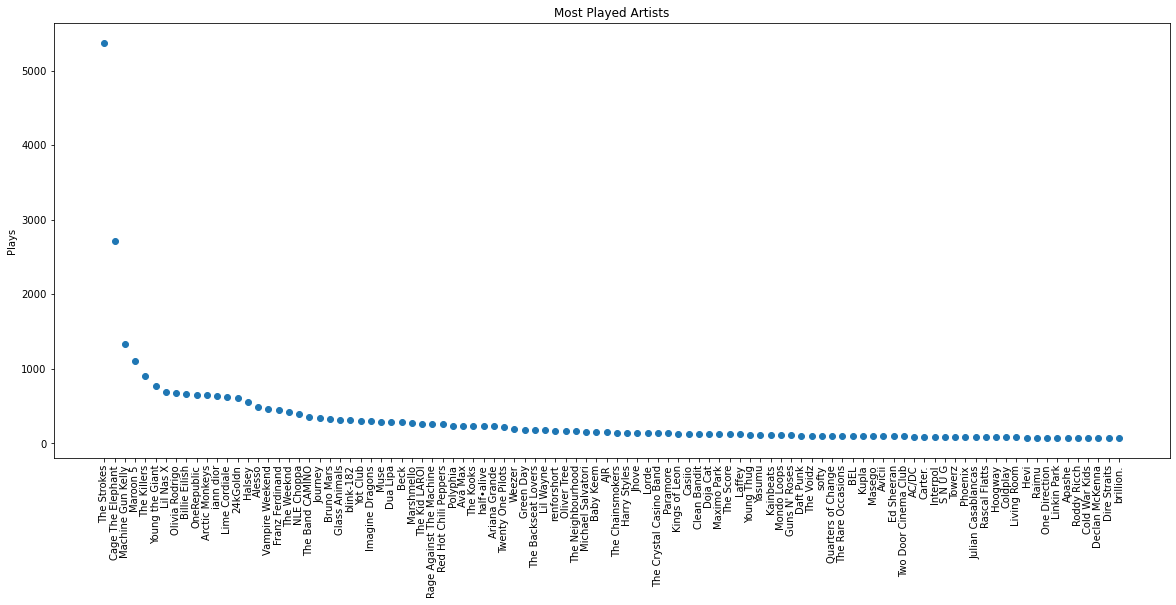

In [ ]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(artists.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Played Artists')
plt.ylabel('Plays')
plt.show()

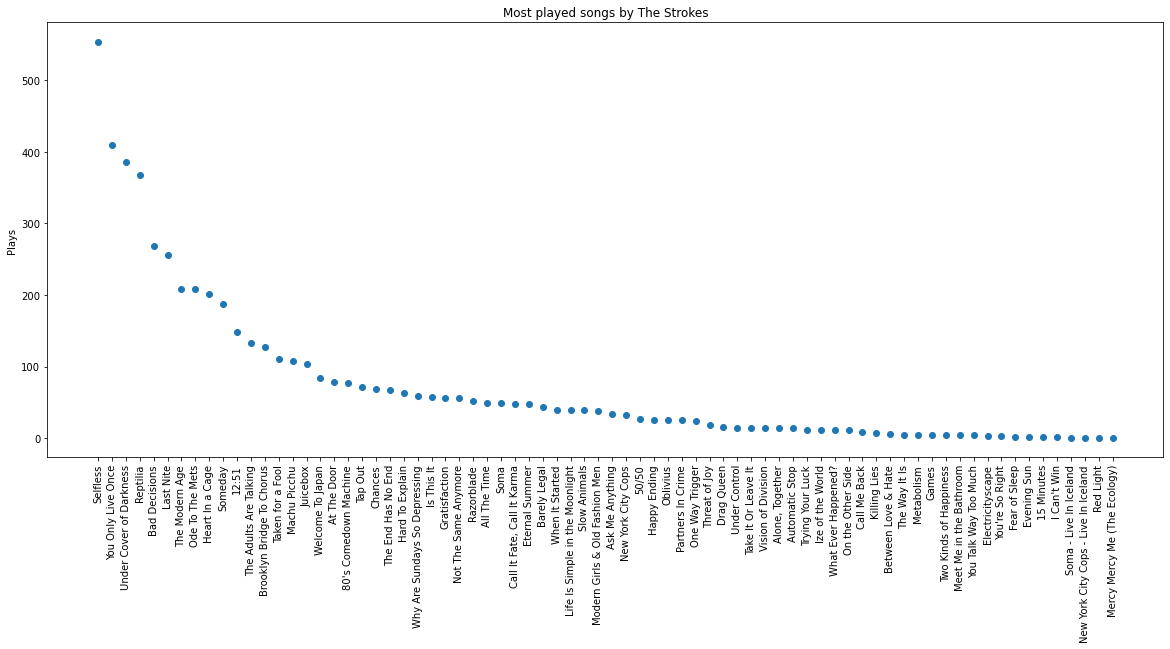

In [ ]:
plotArtist("The Strokes", 100)

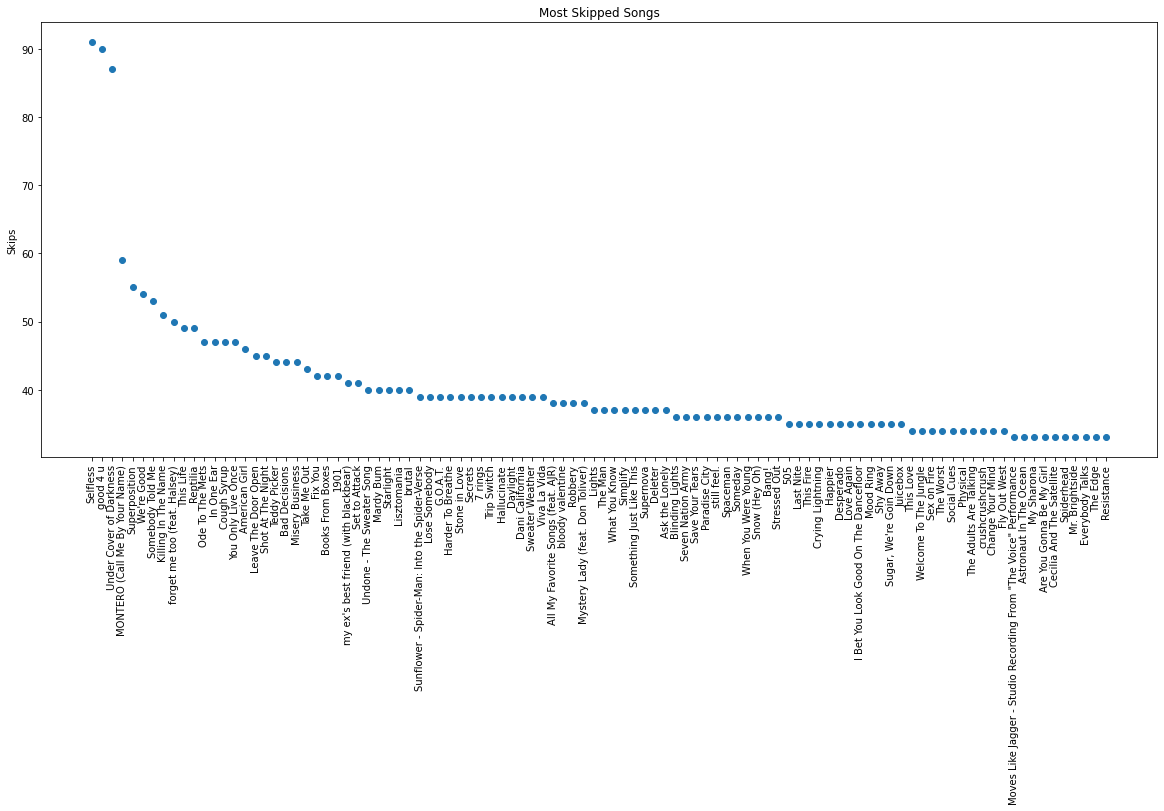

In [ ]:
skipped_tracks = skipped['trackName'].value_counts()
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(skipped_tracks.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Skipped Songs')
plt.ylabel('Skips')
plt.show()

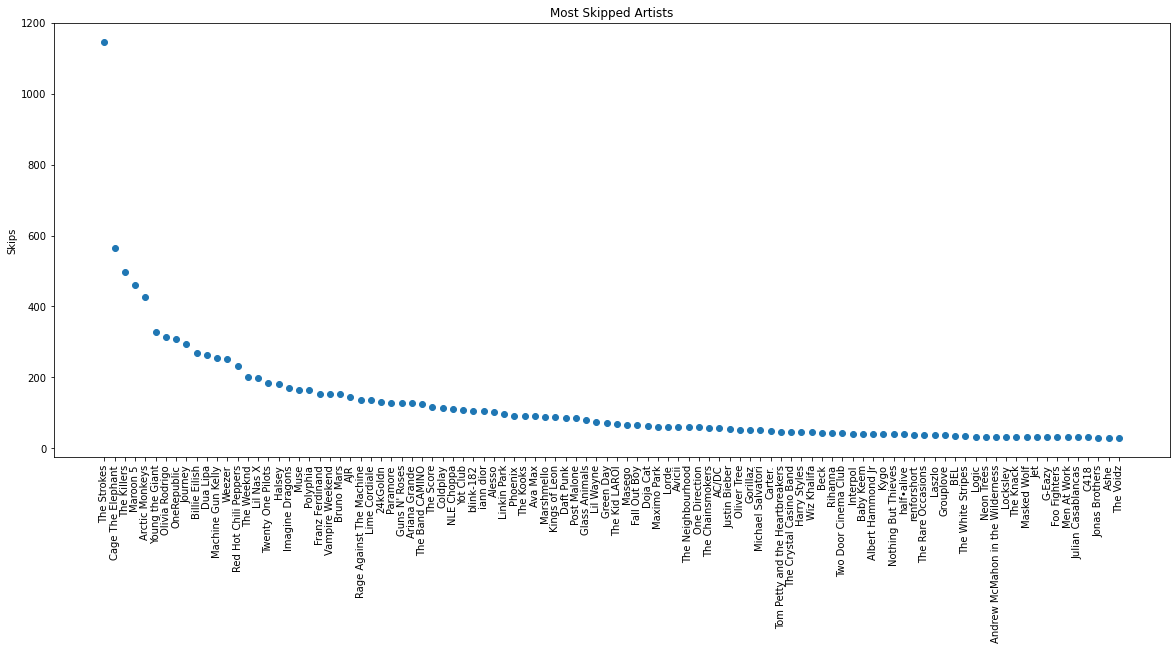

In [ ]:
skipped_artists = skipped['artistName'].value_counts()
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(skipped_artists.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Skipped Artists')
plt.ylabel('Skips')
plt.show()

### Other Information

In [ ]:
# change n to find your n top songs
n = 10
print(topSongPlays(n))

Your top 10 songs: 
Song                       Plays
Selfless                                553
You Only Live Once                      410
Under Cover of Darkness                 386
Reptilia                                367
forget me too (feat. Halsey)            316
my ex's best friend (with blackbear)    279
Bad Decisions                           269
Last Nite                               256
Someday                                 251
still feel.                             227
Name: trackName, dtype: int64


In [ ]:
# Get playtime
t = playtime(unskipped)

Total minutes listened: 154842
Total hours listened: 2580.7


### Artist/Song specific information

In [ ]:
artist = 'The Crystal Casino Band' # change this to an artist of your choice (case sensitive)
temp = artistPlayCount(artist)

You have listened to The Crystal Casino Band endTime       135
artistName      1
trackName      14
msPlayed       36
dtype: int64 times.


In [ ]:
track = "Kilby Girl" # change this to a song name of your choice (case sensitive)
temp = songPlayCount(track)

You have listened to Kilby Girl endTime       54
artistName     1
trackName      1
msPlayed      16
dtype: int64 times.


### Timeframe specific information

In [ ]:
# Plot top artists since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe = '2022-01-01' # change this
topArtistsTimeframe(timeframe)

The Strokes          2199
Cage The Elephant    1640
iann dior             633
24kGoldn              609
Machine Gun Kelly     540
Vampire Weekend       410
The Killers           407
Maroon 5              394
Franz Ferdinand       346
Arctic Monkeys        291
Name: artistName, dtype: int64

In [ ]:
# Plot top songs since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe = '2022-01-01' # change this
topSongsTimeframe(timeframe)

Selfless                                                    294
let you                                                     180
Mood (feat. iann dior)                                      151
Under Cover of Darkness                                     148
You Only Live Once                                          143
Reptilia                                                    128
Back Against the Wall                                       110
Bad Decisions                                               109
Come a Little Closer                                        103
Sick and Tired (ft. Machine Gun Kelly and Travis Barker)     99
Name: trackName, dtype: int64

In [ ]:
# Plot top songs since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe_lower = '2022-01-01' # change this - lower bound
timeframe_upper = '2022-10-30' # change this - upper bound
topArtistsTimeframeBounded(timeframe_lower, timeframe_upper)

The Strokes          2199
Cage The Elephant    1640
iann dior             633
24kGoldn              609
Machine Gun Kelly     540
Vampire Weekend       410
The Killers           407
Maroon 5              394
Franz Ferdinand       346
Arctic Monkeys        291
Name: artistName, dtype: int64

In [ ]:
# Plot top songs since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe_lower = '2022-01-01' # change this - lower bound
timeframe_upper = '2022-10-31' # change this - upper bound
topSongsTimeframeBounded(timeframe_lower, timeframe_upper)

Selfless                                                    294
let you                                                     180
Mood (feat. iann dior)                                      151
Under Cover of Darkness                                     148
You Only Live Once                                          143
Reptilia                                                    128
Back Against the Wall                                       110
Bad Decisions                                               109
Come a Little Closer                                        103
Sick and Tired (ft. Machine Gun Kelly and Travis Barker)     99
Last Nite                                                    97
my ex's best friend (with blackbear)                         91
VALENTINO                                                    89
Cigarette Daydreams                                          79
Ode To The Mets                                              79
Campus                                  

In [ ]:
# Get listening time for a given month
# inputs - month number and year
month = 5 
year = 2022 
listeningTimeMonth(month, year)

243.76688444444443

In [ ]:
# Get listening time for a given artist in hours
# Change artist name
artist = 'Cage The Elephant'
listeningTimeArtist(artist)

162.29648138888888